In [1]:
import pandas as pd
import matplotlib.pyplot as plt

TRAIN_22_DATA_PATH = './datasets/WASSA22_train.tsv'
DEV_22_DATA_PATH = './datasets/WASSA22_dev.tsv'
TEST_22_DATA_PATH = './datasets/WASSA22_test.tsv'

TRAIN_23_DATA_PATH = './datasets/WASSA23_essay_level_with_labels_train.tsv'
DEV_23_DATA_PATH = './datasets/WASSA23_essay_level_dev.tsv'
TEST_23_DATA_PATH = './datasets/WASSA23_essay_level_test.tsv'

train_22_df = pd.read_csv(TRAIN_22_DATA_PATH, sep='\t')
dev_22_df = pd.read_csv(DEV_22_DATA_PATH, sep='\t')
test_22_df = pd.read_csv(TEST_22_DATA_PATH, sep='\t')

essay_22_df = pd.concat([train_22_df[['message_id', 'essay', 'emotion']], dev_22_df[['message_id', 'essay', 'emotion']], test_22_df[['message_id', 'essay']]])

train_23_df = pd.read_csv(TRAIN_23_DATA_PATH, sep='\t')
dev_23_df = pd.read_csv(DEV_23_DATA_PATH, sep='\t')
test_23_df = pd.read_csv(TEST_23_DATA_PATH, sep='\t')

essay_23_df = pd.concat([train_23_df[['essay_id', 'essay']], dev_23_df[['essay_id', 'essay']], test_23_df[['essay_id', 'essay']]])

KeyError: "['emotion'] not in index"

In [2]:
essay_22_df

,message_id,essay
0,R_1hGrPtWM4SumG0U_1,it is really diheartening to read about these ...
1,R_1hGrPtWM4SumG0U_2,the phone lines from the suicide prevention li...
2,R_1hGrPtWM4SumG0U_3,"no matter what your heritage, you should be ab..."
3,R_1hGrPtWM4SumG0U_4,it is frightening to learn about all these sha...
4,R_1hGrPtWM4SumG0U_5,the eldest generation of russians aren't being...
...,...,...
520,R_1gShpZuf35KXreS_1,"Hey, I've always liked Billy Bob Thornton and ..."
521,R_1gShpZuf35KXreS_2,The fact that Donald Trump just peaced out of ...
522,R_1gShpZuf35KXreS_3,I'm not okay! How can anyone harm something so...
523,R_1gShpZuf35KXreS_4,I don't know anything outside of this article ...


In [3]:
essay_23_df

,essay_id,essay
0,1,It breaks my heart to see people living in tho...
1,2,I wonder why there aren't more people trying t...
2,4,"After reading the article, you can't help but ..."
3,5,It is so sad that someone who had such an amaz...
4,7,"From reading the article, it looks like the wo..."
...,...,...
95,95,Check out this story. It is an outrage that so...
96,96,I just read a story about a person who was bro...
97,97,I just read this article and it's really messe...
98,98,I just read about a man who is being deported ...


In [15]:
essay_23_df['22_id'] = ''
essay_23_df['22_overlap_perc'] = ''
essay_23_df['23_overlap_perc'] = ''
for index, row in essay_23_df.iterrows():
    essay = row['essay'].lower().split()
    max_index, max = essay_22_df['essay'].apply(lambda x: len(set(x.lower().split()).intersection(essay))).agg(['idxmax', 'max']) # + di un massimo?
    essay_23_df.loc[index, '22_id'] = max_index
    essay_23_df.loc[index, '23_overlap_perc'] = max / len(essay)
    essay_23_df.loc[index, '22_overlap_perc'] = max / len(essay_22_df.iloc[max_index]['essay'].split())

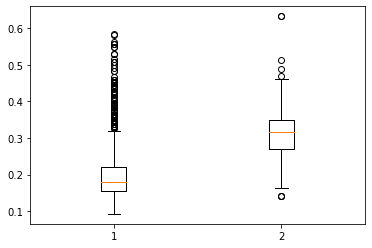

In [16]:
plt.boxplot(x=[essay_23_df['22_overlap_perc'], essay_23_df['23_overlap_perc']])
plt.show()

In [20]:
idxmax = pd.to_numeric(essay_23_df['22_overlap_perc']).idxmax()
print("23 train essay")
print(essay_23_df.loc[idxmax, 'essay'])
print("22 most similar test essay")
print(essay_22_df.iloc[essay_23_df.iloc[idxmax]['22_id']]['essay'])


23 train essay
This is just crazy that people are still dying today when there is medicine that can easily save there lives. There should be enough to go around when epidemics like this happen as this is such a senseless horrible way to die. I get that it is hard to get ahead and prepared for epidemics but there should be some sort of procedures in place just in case. Also i dont see how the government could deny giving the vaccines even if there were side effects from it it is still better then death. I think ramping up things like giving out chlorine tabelts for water is a great preventitive step to reduce epidemics like this instead of just solely relying on the vaccines. I feel for the doctors who are over worked and no theres a way to help these people but cant.
22 most similar test essay
It may make me sound horrible, but I'm torn on this. No one should have to suffer like that for the crime of theft, it's barbaric, but if it really was a twenty-something that was part of an arme

In [ ]:
# memorizzare i massimi come liste (stringhe)
# controllare maualmente esempi fuori dai baffi
# vedere distribuzioni di emozioni sul dataest del 2022 (single labels?)